In [3]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import numpy as np

In [7]:
dataset = pd.read_csv("BoomBikes.csv")


In [9]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
dataset.shape


(730, 16)

In [13]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [15]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [21]:
# assigning string values to different seasons instead of numeric values

# 1 = spring
dataset.loc [(dataset['season'] == 1), 'season'] = 'spring'

#2  = summer
dataset.loc [(dataset['season'] == 2), 'season'] = 'summer'

# 3 fall 
dataset.loc [(dataset['season'] == 3), 'season'] = 'fall'

# winter
dataset.loc [(dataset['season'] == 4), 'season'] = 'winter'

In [25]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [29]:
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [33]:
def object_map_mnths(x):
    return x.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [35]:
dataset[['mnth']] = dataset[['mnth']].apply(object_map_mnths)

In [37]:
dataset['mnth'].astype('category').value_counts()

mnth
Aug     62
Dec     62
Jan     62
July    62
Mar     62
May     62
Oct     62
Apr     60
June    60
Nov     60
Sep     60
Feb     56
Name: count, dtype: int64

In [39]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [49]:
def str_map_weekday(x):
    return x.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [51]:
dataset[['weekday']] = dataset[['weekday']].apply(str_map_weekday)

In [53]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon    105
Sat    105
Sun    105
Fri    104
Thu    104
Tue    104
Wed    103
Name: count, dtype: int64

In [57]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [63]:
# Clear few clouds partly cloudy
dataset.loc[dataset['weathersit'] == 1, 'weathersit'] = 'A'

# Misty cloudy
dataset.loc[dataset['weathersit'] == 2, 'weathersit'] = 'B'

# Light snow heavy rain
dataset.loc[dataset['weathersit'] == 3, 'weathersit'] = 'C'


In [65]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## 2. DATA VISUALIZATION 

In [74]:
# importing libs
import matplotlib.pyplot as plt
import seaborn as sns


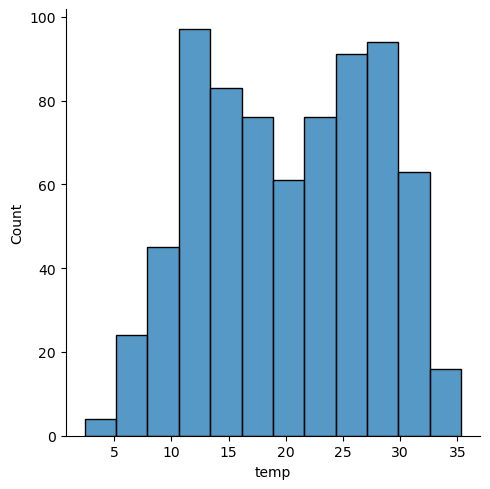

In [76]:
# temperature
sns.displot(dataset['temp'])

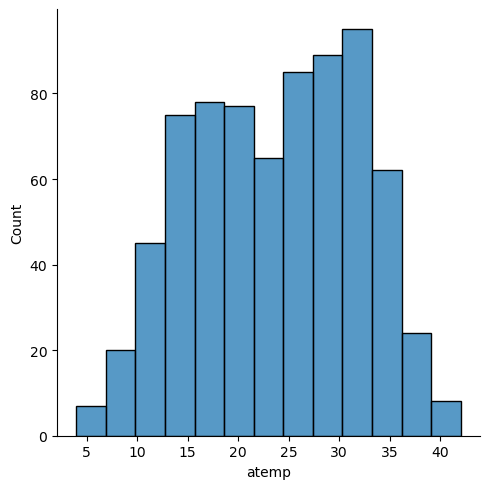

In [78]:
# actual temperature
sns.displot(dataset['atemp'])
plt.show()

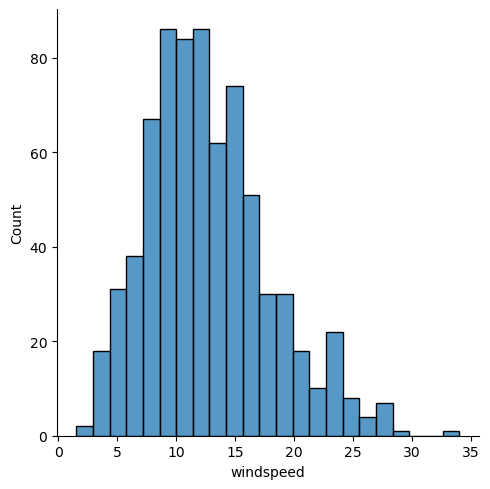

In [80]:
# actual temperature
sns.displot(dataset['windspeed'])
plt.show()

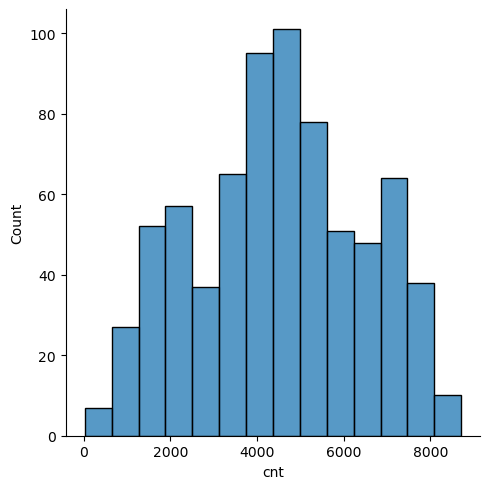

In [82]:
sns.displot(dataset['cnt'])
plt.show()

In [90]:
dataset['dteday'] = dataset['dteday'].astype('datetime64[ns]')


In [100]:
dataset_categorical = dataset.select_dtypes(exclude=['float64', 'datetime64', 'int64'])


In [102]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [104]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thu,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


<Axes: xlabel='season', ylabel='cnt'>

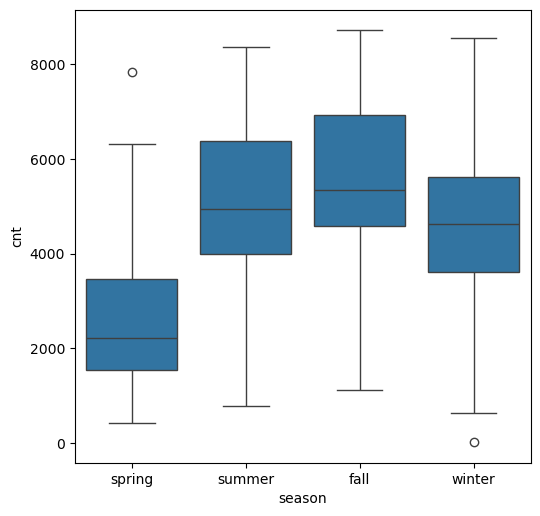

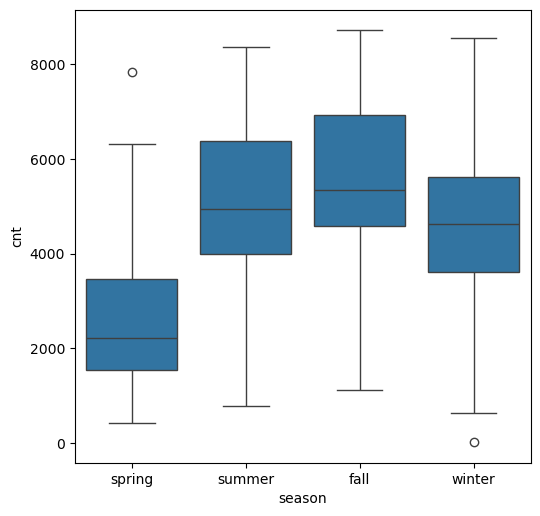

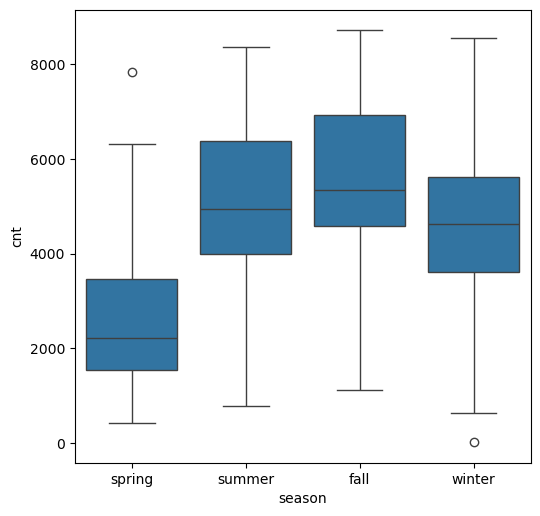

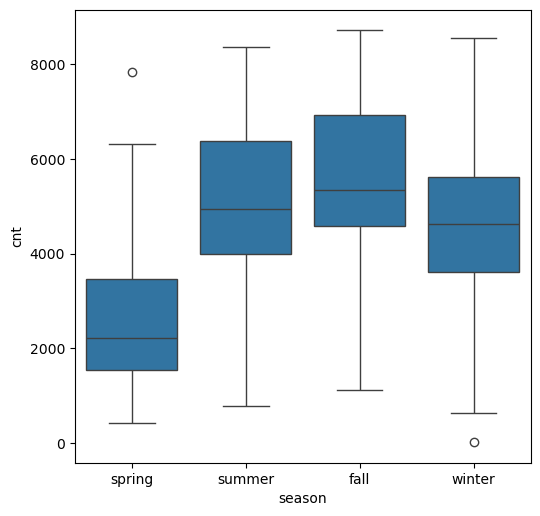

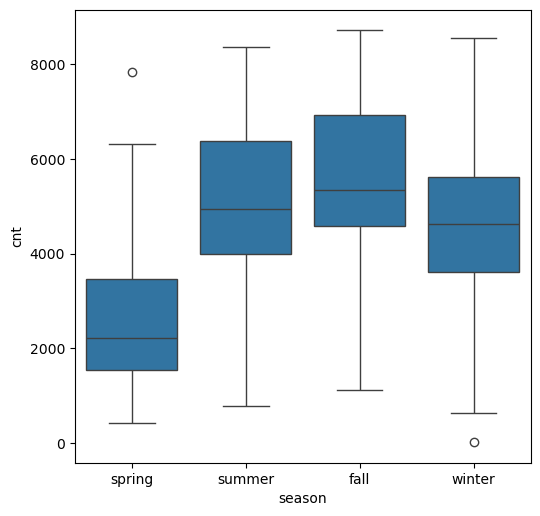

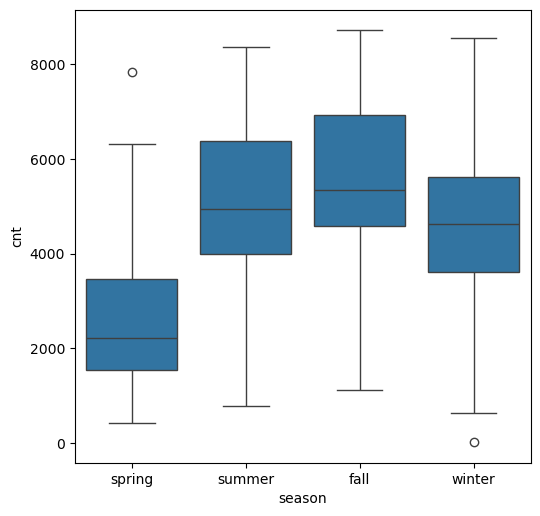

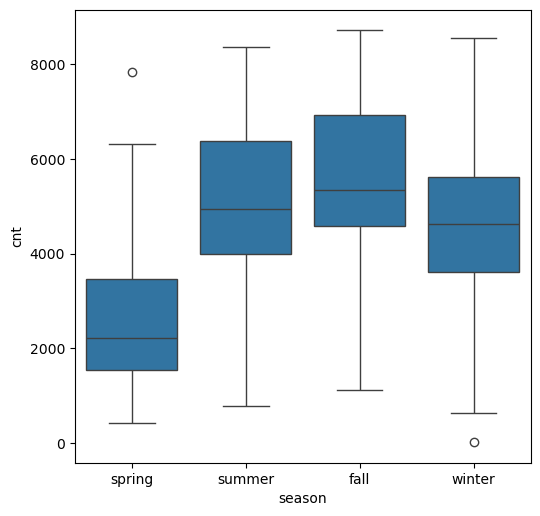

In [110]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)
plt.figure(figsize=(20,20))
plt.subplot(3,3,2)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)
plt.figure(figsize=(20,20))
plt.subplot(3,3,3)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)
plt.figure(figsize=(20,20))
plt.subplot(3,3,4)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)
plt.figure(figsize=(20,20))
plt.subplot(3,3,5)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)
plt.figure(figsize=(20,20))
plt.subplot(3,3,6)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)
plt.figure(figsize=(20,20))
plt.subplot(3,3,7)
sns.boxplot(x = 'season' , y = 'cnt' , data = dataset)

In [118]:
intVarlist = ["casual", "registered", "cnt" ]

for var in intVarlist:
    dataset[var] = dataset[var].astype("float")

In [126]:
dataset_numeric = dataset.select_dtypes(include=["float64"])
dataset_numeric.head()


,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


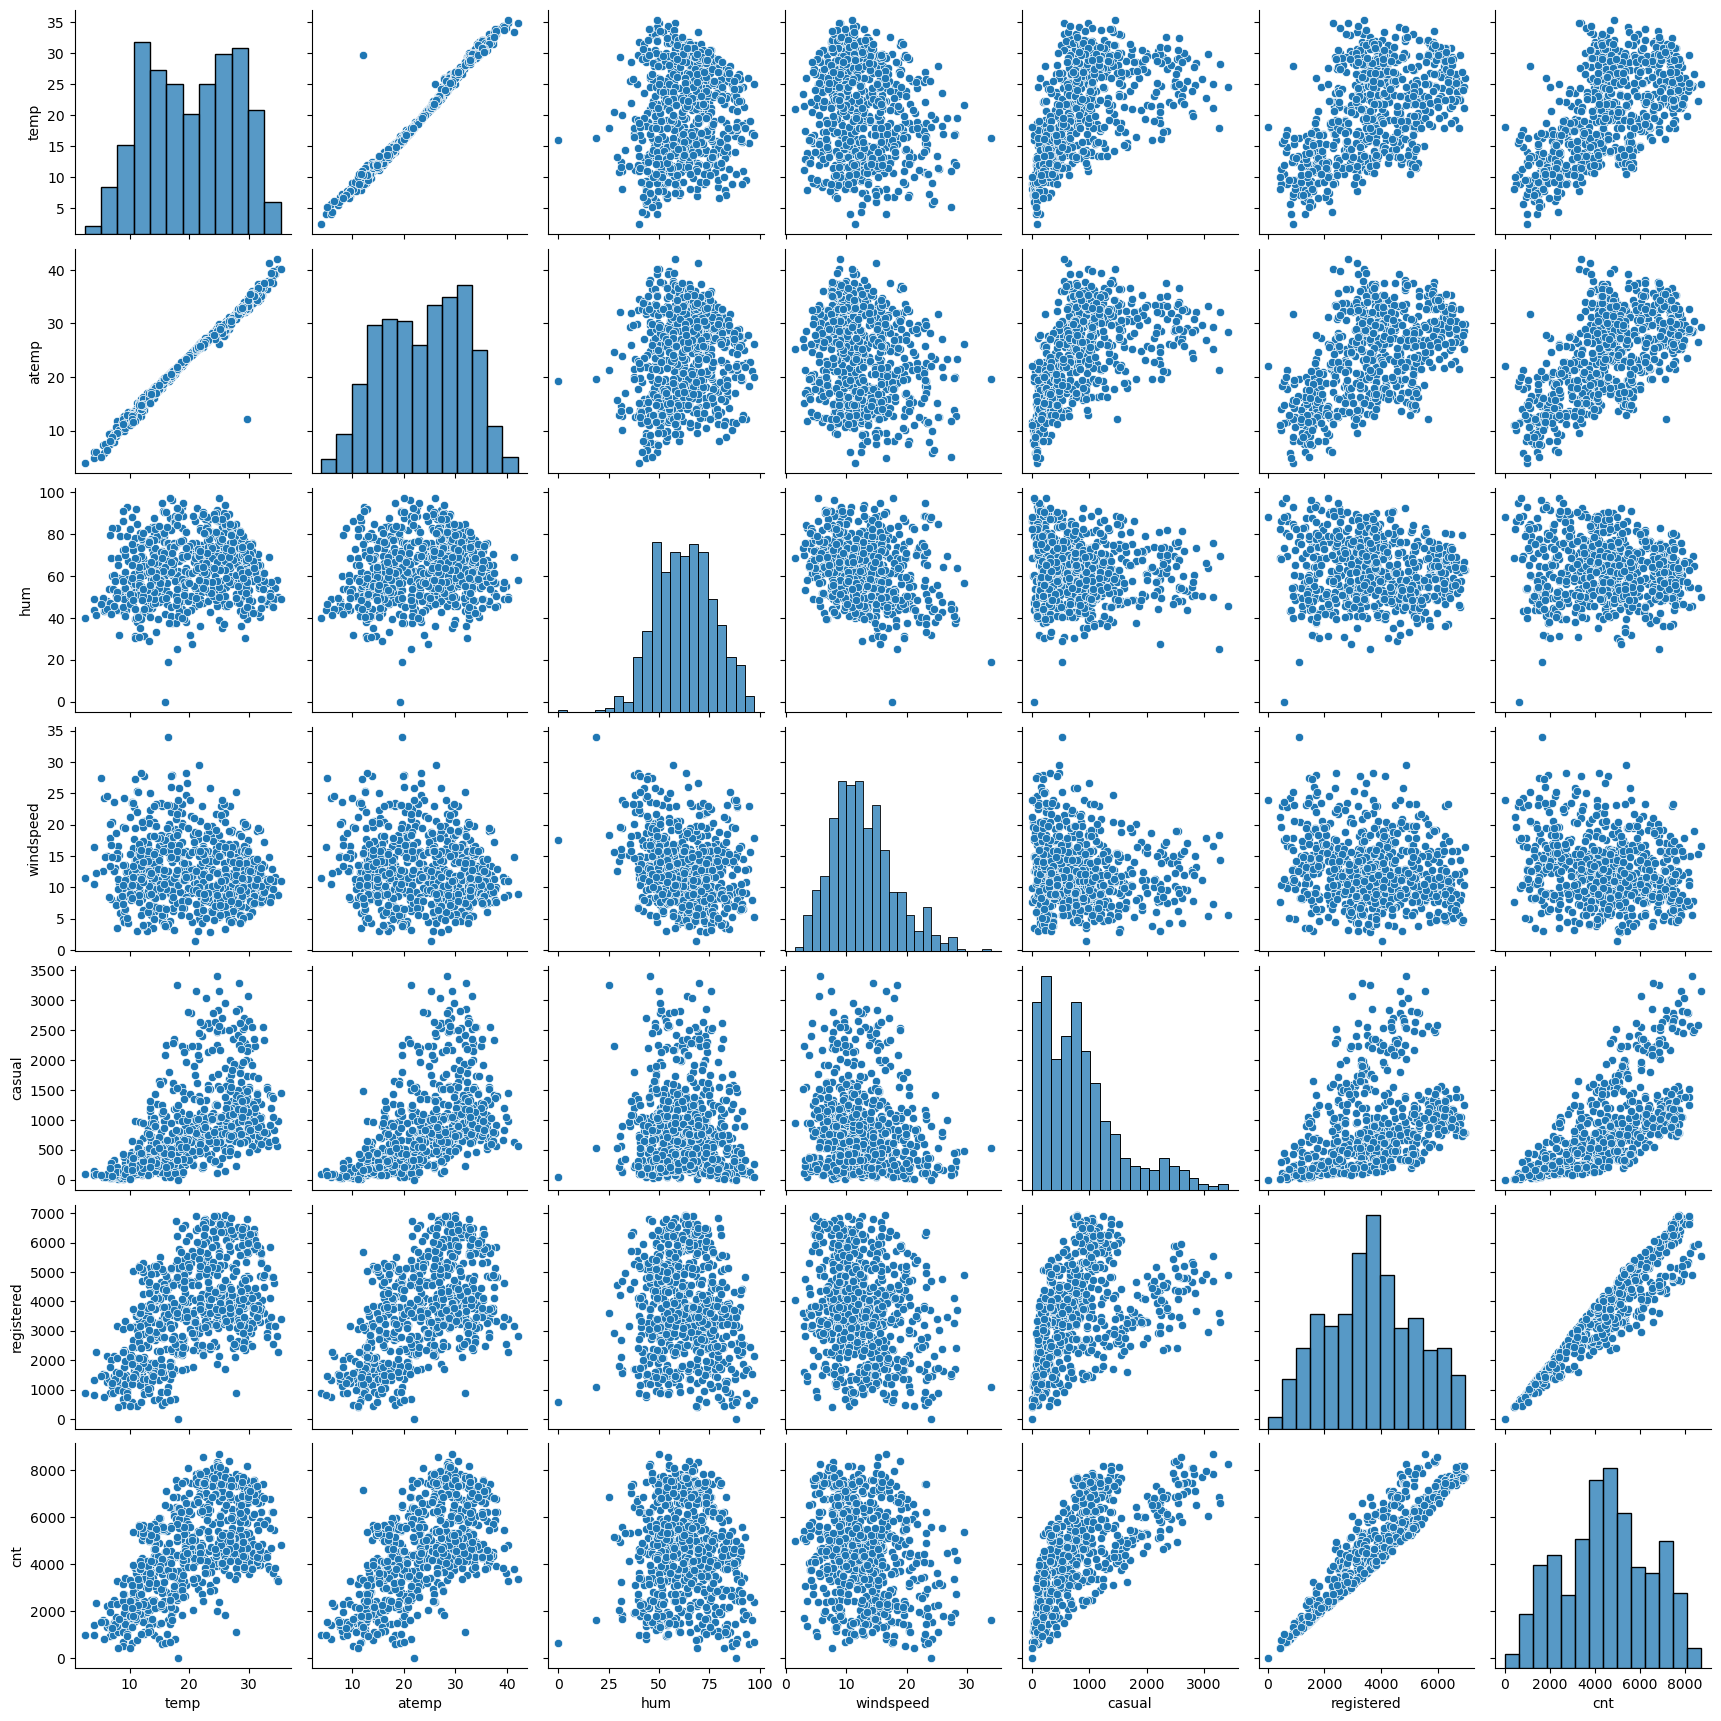

In [133]:
sns.pairplot(dataset_numeric)
plt.show()

In [137]:
cor = dataset_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


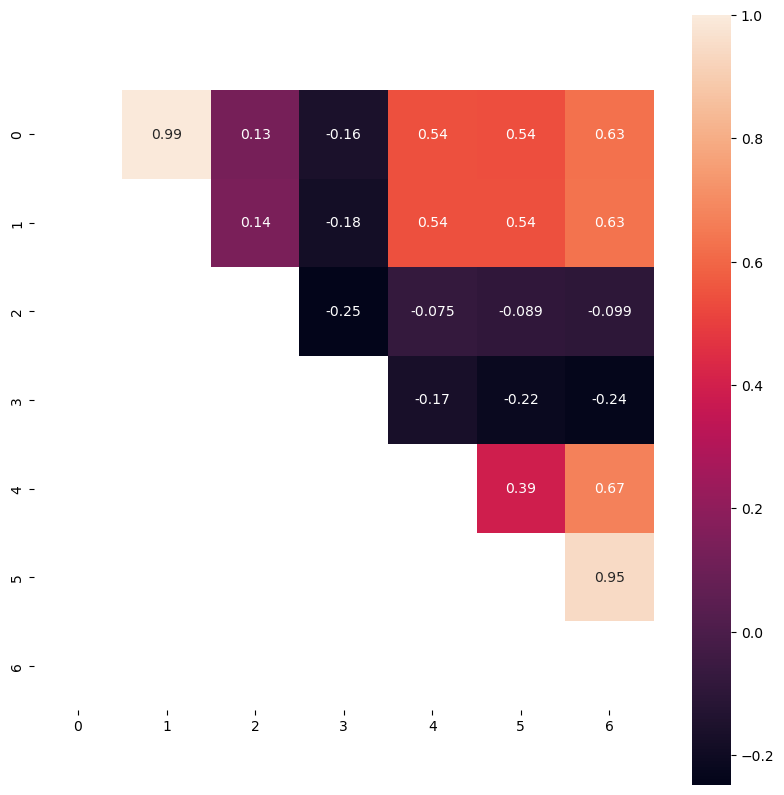

In [155]:
# Assuming 'cor' is defined earlier in your code
mast = np.array(cor)

# Create a mask for the lower triangle
mask = np.tril(np.ones_like(mast, dtype=bool))

# Create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

# Create a heatmap
sns.heatmap(mast, mask=mask, vmax=1, square=True, annot=True)

plt.show()

In [157]:
dataset.drop('atemp',axis=1, inplace = True)


In [159]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## DATA Preparation

In [164]:
dataset_categorical = dataset.select_dtypes(include = ['object'])

In [168]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [170]:
dataset_dummies = pd.get_dummies(dataset_categorical,drop_first = True)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [174]:
dataset = dataset.drop(list(dataset_categorical.columns),axis = 1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [176]:
dataset = pd.concat([dataset,dataset_dummies], axis =1 )
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,False,False,False,True,False,False,False,False,True,False
1,2,2018-02-01,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,False,False,False,False,True,False,False,False,True,False
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,False,False,True,False,False,False,False,False,False,False
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,False,False,False,False,False,False,True,False,False,False
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,False,False,False,False,False,False,False,True,False,False


In [178]:
dataset=dataset.drop(['instant','dteday'], axis=1, inplace = False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,True,...,False,False,False,True,False,False,False,False,True,False
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,True,...,False,False,False,False,True,False,False,False,True,False
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,True,...,False,False,True,False,False,False,False,False,False,False
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,True,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,True,...,False,False,False,False,False,False,False,True,False,False


### MOdel Build  and Evaluation

In [185]:
# import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression


In [189]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(dataset,train_size = 0.7, test_size = 0.3, random_state=100)


In [192]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,False,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,True,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,True,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,False,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,False,...,False,False,True,False,False,False,False,False,True,False
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,False,...,False,False,False,False,False,True,False,False,False,False
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,True,...,False,False,False,False,False,False,False,True,False,False
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,False,...,False,False,False,True,False,False,False,False,True,False


In [196]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
scaler = MinMaxScaler()

In [200]:
var=['temp','hum','windspeed','casual','registered','cnt']
df_train[var] = scaler.fit_transform(df_train[var])
df_train.describe()


,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,0.254661,0.523944,0.513620
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,0.206011,0.228175,0.224593
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.094179,0.353487,0.356420
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.212740,0.525123,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.327415,0.696073,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


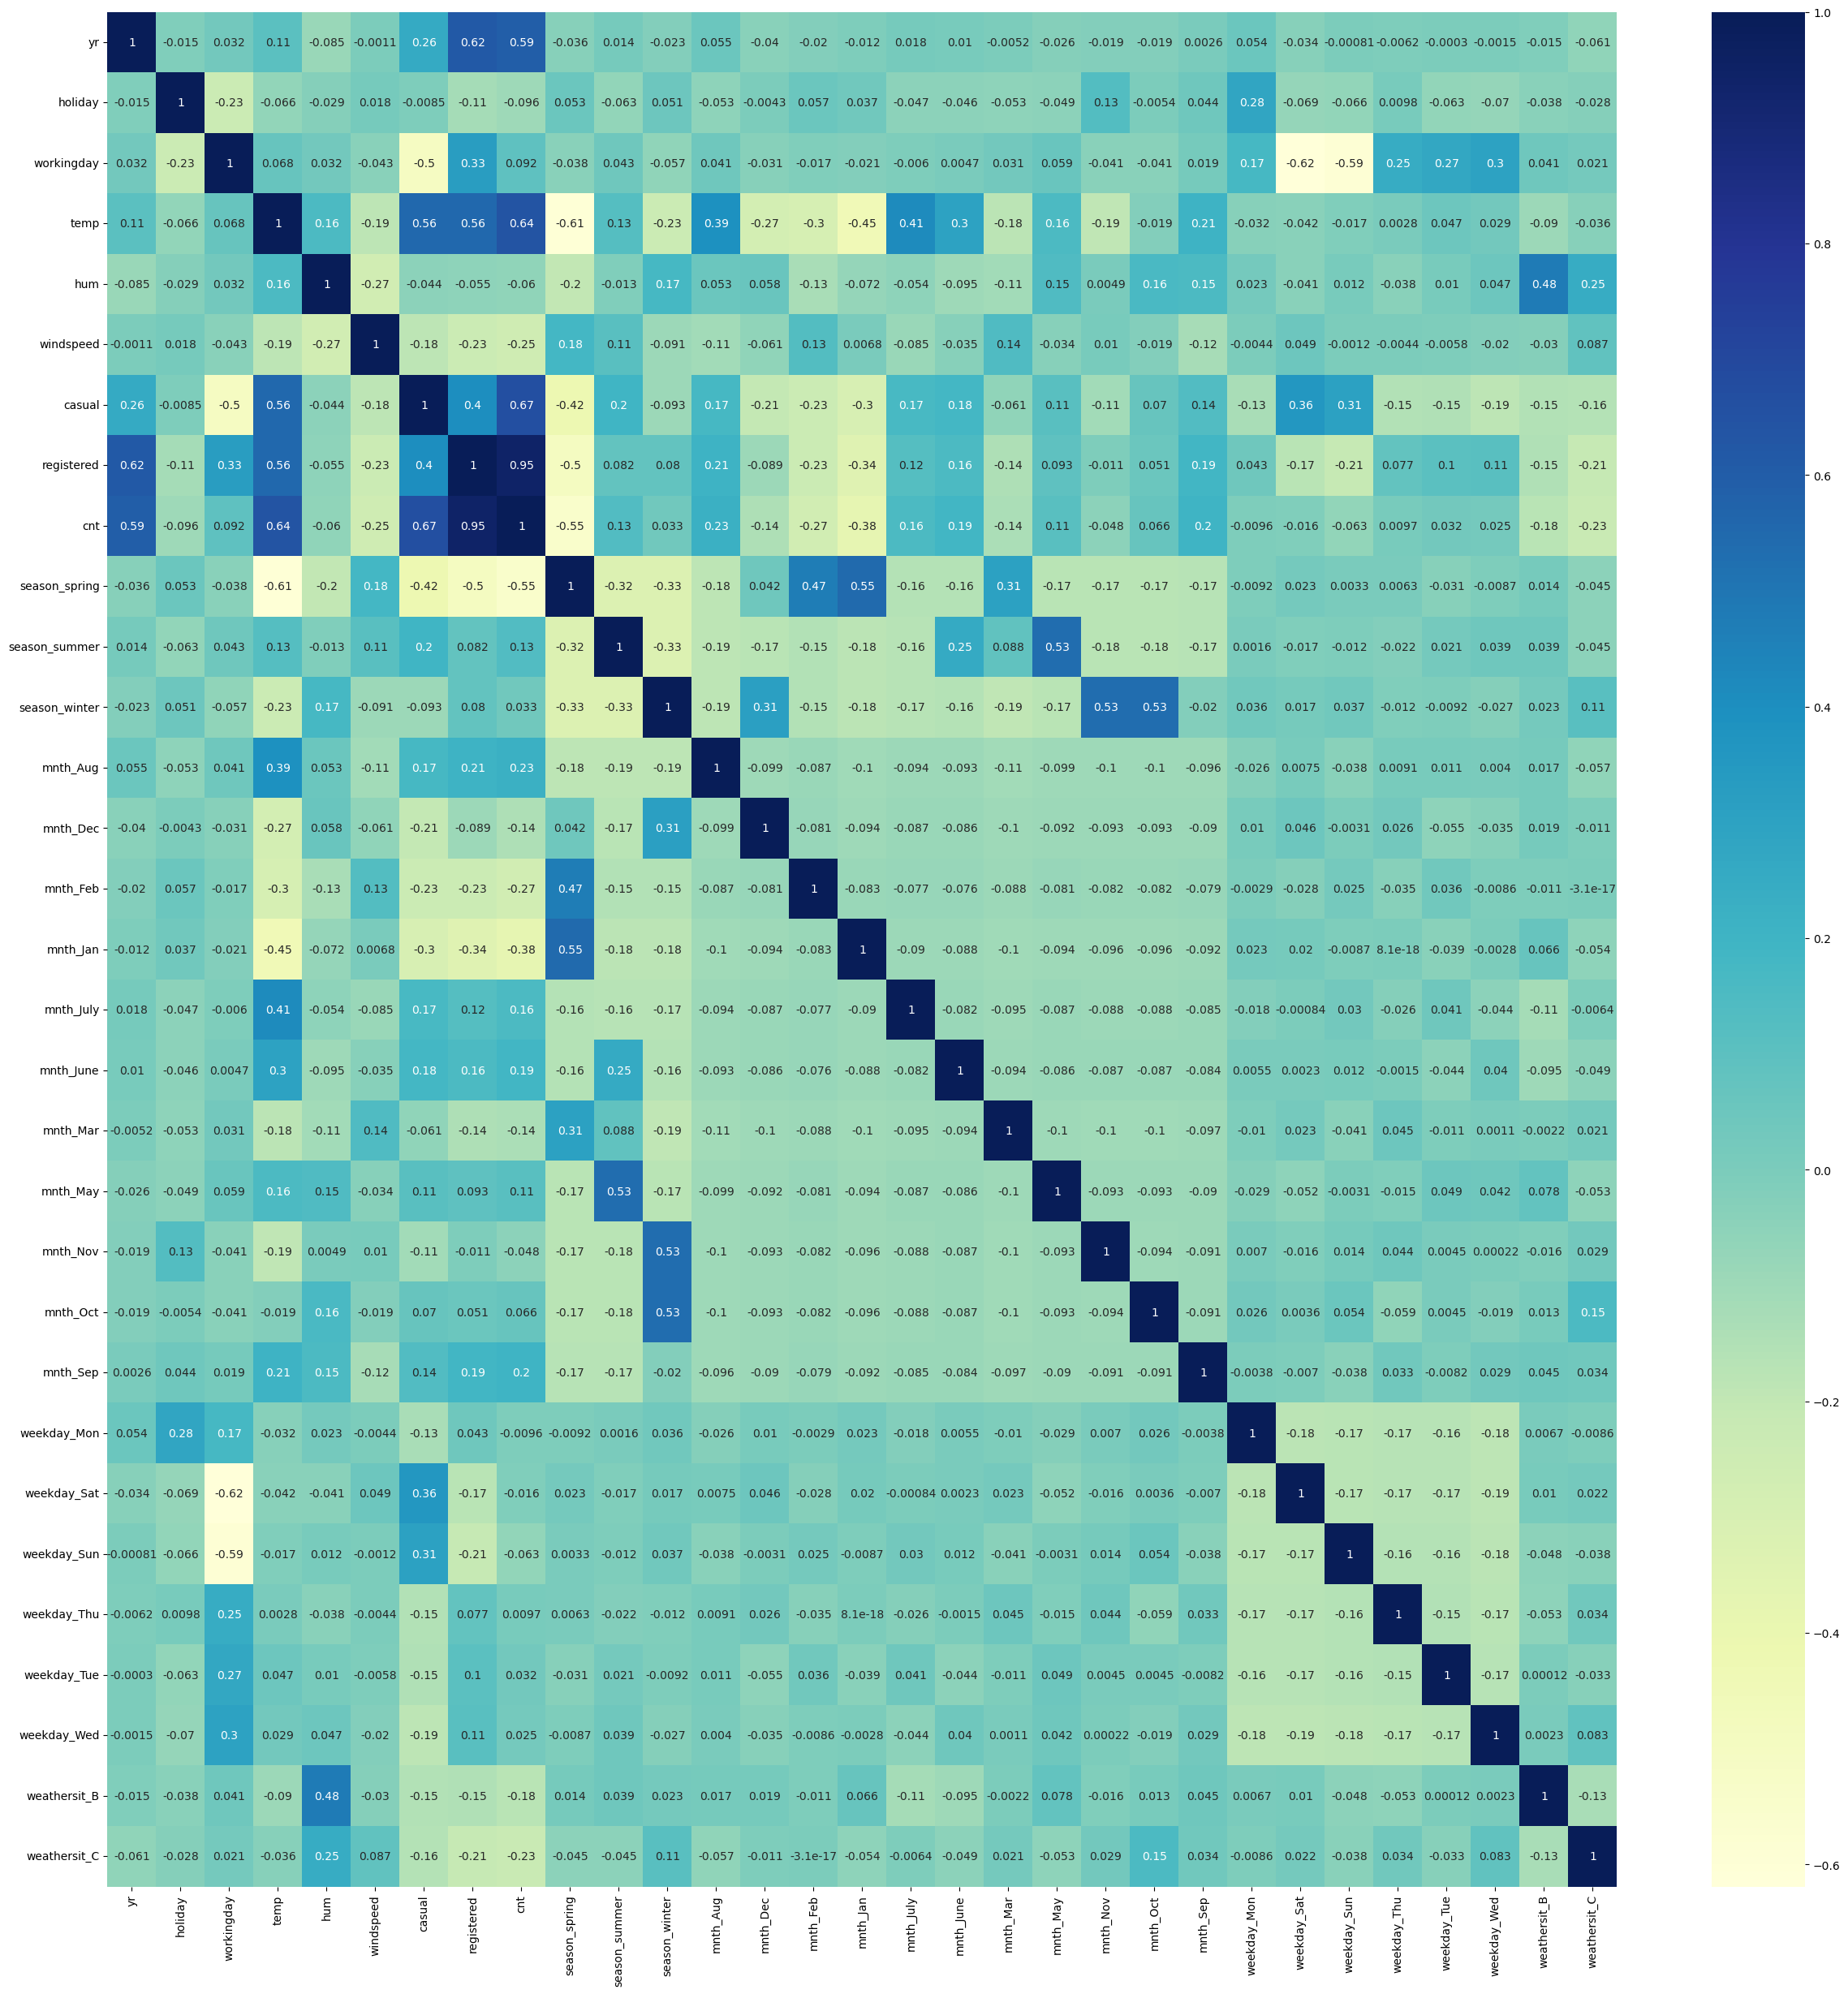

In [202]:
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),cmap='YlGnBu',annot = True)
plt.show()

In [214]:
x_train = df_train.drop(['casual', 'registered'],axis = 1)
y_train = df_train.pop('cnt')

In [216]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,False,False,True,...,True,False,False,False,False,False,True,False,False,False
576,1,0,1,0.815169,0.725633,0.264686,0.827658,False,False,False,...,False,False,False,False,False,False,True,False,False,False
426,1,0,0,0.442393,0.640189,0.255342,0.465255,True,False,False,...,False,False,False,True,False,False,False,False,True,False
728,1,0,0,0.245101,0.498067,0.663106,0.204096,True,False,False,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.395666,0.504508,0.188475,0.482973,False,True,False,...,False,False,False,True,False,False,False,False,True,False


In [218]:
np.array(x_train)

array([[1, 0, 1, ..., False, False, False],
       [1, 0, 1, ..., False, False, False],
       [1, 0, 0, ..., False, True, False],
       ...,
       [0, 0, 1, ..., True, False, False],
       [0, 0, 0, ..., False, True, False],
       [0, 0, 1, ..., False, True, False]], dtype=object)

In [226]:
import pandas as pd
import statsmodels.api as sm

# Sample data creation (replace this with your actual data)
# y_train: dependent variable (target)
# x_train: independent variables (features)
# Example:
# y_train = pd.Series([1, 2, 3, 4, 5])
# x_train = pd.DataFrame({
#     'feature1': [10, 20, 30, 40, 50],
#     'feature2': [5, 15, 25, 35, 45]
# })

# Replace the above sample data with your actual data
# y_train = ...
# x_train = ...

# Check and convert data types
y_train = pd.to_numeric(y_train, errors='coerce')
x_train = x_train.apply(pd.to_numeric, errors='coerce')

# Identify and print any non-numeric values
print("Non-numeric values in y_train:")
print(y_train[~y_train.apply(lambda x: isinstance(x, (int, float)))])
for col in x_train.columns:
    print(f"Non-numeric values in {col}:")
    print(x_train[col][~x_train[col].apply(lambda x: isinstance(x, (int, float)))])

# Handle missing values
y_train.dropna(inplace=True)
x_train.dropna(inplace=True)

# Align y_train and x_train after dropping NaNs
y_train = y_train.loc[x_train.index]

# Add a constant to the independent variables
x_train_lm = sm.add_constant(x_train)

# Fit the OLS model
lr = sm.OLS(y_train, x_train_lm).fit()

# Output the summary of the regression results
print(lr.summary())


Non-numeric values in y_train:
Series([], Name: cnt, dtype: float64)
Non-numeric values in yr:
Series([], Name: yr, dtype: int64)
Non-numeric values in holiday:
Series([], Name: holiday, dtype: int64)
Non-numeric values in workingday:
Series([], Name: workingday, dtype: int64)
Non-numeric values in temp:
Series([], Name: temp, dtype: float64)
Non-numeric values in hum:
Series([], Name: hum, dtype: float64)
Non-numeric values in windspeed:
Series([], Name: windspeed, dtype: float64)
Non-numeric values in cnt:
Series([], Name: cnt, dtype: float64)
Non-numeric values in season_spring:
Series([], Name: season_spring, dtype: bool)
Non-numeric values in season_summer:
Series([], Name: season_summer, dtype: bool)
Non-numeric values in season_winter:
Series([], Name: season_winter, dtype: bool)
Non-numeric values in mnth_Aug:
Series([], Name: mnth_Aug, dtype: bool)
Non-numeric values in mnth_Dec:
Series([], Name: mnth_Dec, dtype: bool)
Non-numeric values in mnth_Feb:
Series([], Name: mnth_Feb,

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [228]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [232]:
print(lm.coef_)
print(lm.intercept_)


[-1.77003185e-16 -1.05482264e-16  6.43810966e-17 -4.15519262e-16
 -3.27232397e-17  3.01632620e-17  1.00000000e+00  5.23075628e-16
 -2.55133171e-16 -3.91860734e-16 -9.20453926e-17  2.82886078e-16
  1.02287012e-16  2.88365420e-16 -4.77157195e-18 -7.47980916e-17
 -7.10802218e-17 -3.33618492e-17  3.06050638e-18 -2.47255209e-16
 -1.09829678e-16  1.34670375e-16 -3.10822988e-16 -2.60578004e-16
  6.03538238e-17  5.61693092e-17  1.50316136e-17  1.74122059e-17
  6.92272647e-16]
0.0


In [254]:
from sklearn.feature_selection import RFE

In [262]:
lm = LinearRegression()
rfe1 = RFE(estimator=lm, n_features_to_select=15)  # Specify the correct arguments

rfe1.fit(x_train, y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[ True False  True False  True  True  True False False False False False
  True  True  True  True  True  True False False False False  True  True
 False False  True  True False]
[ 1  5  1 12  1  1  1  8  7  3  4 13  1  1  1  1  1  1 15  9 14 10  1  1
 11  6  1  1  2]


In [264]:
col1 = x_train.columns[rfe1.support_]

In [266]:
col1

Index(['yr', 'workingday', 'hum', 'windspeed', 'cnt', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May', 'weekday_Sat',
       'weekday_Sun', 'weekday_Wed', 'weathersit_B'],
      dtype='object')

In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [296]:
x_train_rfe1 = x_train_rfe1.drop('cont', axis=1, errors='ignore')


In [298]:
print([col for col in x_train_rfe1.columns if 'cont' in col.lower()])


[]


In [302]:
a = x_train_rfe1.drop('cont', axis=1, errors='ignore')  # Ensure the DataFrame exists


In [304]:
print(a.columns)


Index(['yr', 'workingday', 'hum', 'windspeed', 'cnt', 'mnth_Feb', 'mnth_Jan',
       'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May', 'weekday_Sat',
       'weekday_Sun', 'weekday_Wed', 'weathersit_B'],
      dtype='object')


In [314]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Ensure 'a' contains only numeric values and no missing data
a = a.select_dtypes(include=[np.number]).dropna()

# Create a DataFrame for VIF
vif = pd.DataFrame()
vif['features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif= vif.sort_values(by = "VIF", ascending = False)
vif


,features,VIF
4,cnt,8.28
2,hum,7.60
3,windspeed,3.43
0,yr,3.19
1,workingday,3.04


In [334]:
from sklearn.preprocessing import LabelEncoder

# Assuming y_train is a string Series/array
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Now use y_train_encoded for model training
model = LogisticRegression()
model.fit(x_train, y_train_encoded)

LogisticRegression()